<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/Metodo_Crank_Nicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Método Implícito de Crank Nicolson**

Resolver númericamente la ecuaión de calor:

$$\frac{∂u}{∂t}(x,t)=\frac{∂^2u}{∂x^2}(x,t) \quad 0<x<1, \quad 0<t $$

Sujeto a las condiciones de frontera
$$u(0,t)=0, \qquad u(1,t)=0 \qquad \text{para} \qquad t\geq0$$

y condición inicial
$$u(x,0)=1 - 4\left(x - \tfrac{1}{2}\right)^2,
\qquad 0 \le x\le 1$$


Para ello usare el método Implicito de Crank Nicolson con:

$$ h=\frac{1}{10}, \qquad k=0.01, \qquad r=\frac{\alpha^2k}{h^2}$$

A continuación mostraremos cual es la idea general de este método. Partimos de la ecuación de calor:

$$\frac{∂u}{∂t}(x,t)=\frac{∂^2u}{∂x^2}(x,t)$$

De modo que trabando de manera númerica sobre una malla:
$$ x_i=ih, \qquad t_j=jk,$$

y aproximamos: $u_{i,j} ≈u(x_i, t_j)$


1. Utilizaremos diferencias finitas para la aproximación.

    1.1  Derivada temporal (diferencias progresivas)

    $$ \frac{\partial u}{\partial t}(x_i, t_j) ≈ \frac {u_{i,j+1}- u_{i,j}}{k} $$
    Esto aproxima la derivada en el "punto medio":  
    $$
    t_{j+\frac12} = t_j + \frac{k}{2}
    $$

    1.2 Derivada espacial centrada en $t_j$

    $$
    \frac{\partial^2 u}{\partial x^2}(x_i,t_j)
    \approx
    \frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{h^2}.
    $$


    1.3 Derivada espacial centrada en $t_{j+1}$

    $$
    \frac{\partial^2 u}{\partial x^2}(x_i,t_{j+1})
    \approx
    \frac{u_{i+1,j+1}-2u_{i,j+1}+u_{i-1,j+1}}{h^2}.
    $$


2. La idea del método de Nicolson es considerar el promedio de derivadas espaciales en $t_j$ y $t_{j+1}$

$$
\frac{\partial^2 u}{\partial x^2}(x_i,t_{j+\frac12})
\approx
\frac{1}{2}
\left[
\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{h^2}
+
\frac{u_{i+1,j+1}-2u_{i,j+1}+u_{i-1,j+1}}{h^2}
\right].
$$

Esta elección otorga **segundo orden** en tiempo y en espacio.



3. Sustituir en la ecuación de calor, las aproximaciones en diferencias finitas.

Sustituimos en:

$$
\frac{u_{i,j+1}-u_{i,j}}{k}
=
\frac{1}{2}
\left[
\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{h^2}
+
\frac{u_{i+1,j+1}-2u_{i,j+1}+u_{i-1,j+1}}{h^2}
\right]$$

Multiplicamos ambos lados por $k$

$$
u_{i,j+1}-u_{i,j}
=
\frac{k}{2h^2}
\left[
(u_{i+1,j}-2u_{i,j}+u_{i-1,j})
+
(u_{i+1,j+1}-2u_{i,j+1}+u_{i-1,j+1})
\right].
$$

4. Definición del párametro del método $r$

Es cual esta definido como la razon de:
$$r=\frac{\alpha^2 k}{h^2}$$

Sustituyendo los valores obtengo:

$$ r=\frac{(1)^2 (0.01)}{(0.1)^2} =1 $$


5. Distribuimos y agrupamos términos con indice $j+1$

$$
-r\,u_{i-1,j+1}
+
(2+2r)\,u_{i,j+1}
-
r\,u_{i+1,j+1}
=
r\,u_{i-1,j}
+
(2-2r)\,u_{i,j}
+
r\,u_{i+1,j},
$$

para $$i=1,2,\ldots,m-1$$.

Esta es la **formula general del método de Crank- Nicolson**  

6. Moleculas computacionales de este método son:

$$
\begin{matrix}
& \quad & u_{i,j+1} & \\
u_{i-1,j} & \quad &  u_{i,j}   & \quad & u_{i+1,j} \\
\end{matrix}
$$


7. Forma matricial del método

Considerando

$$[2I-rT_{m-1}]u_j= [2I+rT_{m-1}]u_{j-1}$$

por lo que:

$$u_j=[2I-rT_{m-1}]^{-1}[2I-rT_{m-1}]u_{j-1}$$

Donde:

$T_{m-1}$ es la matriz tridiagonal dada de la siguiente forma:

$$
T_{m-1} =
\begin{pmatrix}
-2 & 1  & 0  & \cdots & 0 \\
1  & -2 & 1  & \cdots & 0 \\
0  & 1  & -2 & \ddots & 0 \\
\vdots & \vdots & \vdots & \ddots & 1 \\
0 & 0 & 0 & 1 & -2
\end{pmatrix}.
$$
Además

$$
U_j =
\begin{pmatrix}
u_{1,j}\\
u_{2,j}\\
\vdots\\
u_{m-1,j}
\end{pmatrix}.
$$

La ecuación puede escribirse como:

$$
A\,U_{j+1} = B\,U_{j}.
$$

Donde:

$$
A =
\begin{pmatrix}
2+2r & -r      & 0       & \cdots & 0 \\
-r   & 2+2r    & -r      & \cdots & 0 \\
0    & -r      & 2+2r    & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & -r \\
0 & 0 & 0 & -r & 2+2r
\end{pmatrix}
$$

$$
B =
\begin{pmatrix}
2-2r & r      & 0       & \cdots & 0 \\
r    & 2-2r   & r       & \cdots & 0 \\
0    & r      & 2-2r    & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & r \\
0 & 0 & 0 & r & 2-2r
\end{pmatrix}
$$


Por lo tanto la relacion fundamental del método es:

$
\begin{pmatrix}
2+2r & -r & 0 & \cdots & 0 \\
-r & 2+2r & -r & \cdots & 0 \\
0 & -r & 2+2r & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 2+2r
\end{pmatrix}*\begin{pmatrix}
u_{1j}\\
u_{2j} \\
u_{3j}\\
\vdots  \\
u_{m-1,j}
\end{pmatrix}$ =

$\begin{pmatrix}
2-2r & r & 0 & \cdots & 0 \\
r & 2-2r & r & \cdots & 0 \\
0 & r & 2-2r & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 2-2r
\end{pmatrix}*\begin{pmatrix}
u_{1,j-1}\\
u_{2,j-1} \\
u_{3,j-1}\\
\vdots  \\
u_{m-1,j-1}
\end{pmatrix}$




8. Forma compacta

Definimos la matriz tridiagonal $t_{m-1}=T$

Entonces:

$$
A = 2I + rT, \qquad B = 2I - rT.
$$

Y queda:

$$
U_{j+1} = A^{-1} B\,U_{j}.
$$

9. Sustitución del ejercicio $h = 0.1, k = 0.01, r=1$

La matriz $A = 2I + 2rI - rT$ se convierte en:

$
A=
\begin{pmatrix}
4 & -1 & 0 & \cdots & 0 \\
-1 & 4 & -1 & \cdots & 0 \\
0 & -1 & 4 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & -1 \\
0 & 0 & 0 & -1 & 4
\end{pmatrix}.
$

Igualmente:

$
B=
\begin{pmatrix}
0 & 1 & 0 & \cdots & 0 \\
1 & 0 & 1 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & 1 \\
0 & 0 & 0 & 1 & 0
\end{pmatrix}
+
2I.
$

Entonces la relación queda:

$
A\,U_j = B\,U_{j-1}.
$

$\begin{pmatrix}
4 & -1 & 0 & \cdots & 0 \\
-1 & 4 & -1 & \cdots & 0 \\
0 & -1 & 4 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 4
\end{pmatrix}*\begin{pmatrix}
u_{11}\\
u_{21} \\
u_{31}\\
\vdots  \\
u_{81}\\
u_{91}
\end{pmatrix}=\begin{pmatrix}
u_{20}\\
u_{10}+u_{30} \\
u_{20}+u_{40}\\
\vdots  \\
u_{70}+u_{90}\\
u_{80}
\end{pmatrix}$


In [3]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap

from tabulate import tabulate #Libreria para crear tablas y tabular

Defino la función que corresponde a la condición inicial
$$u(x,0)=1 - 4\left(x - \tfrac{1}{2}\right)^2$$

In [5]:
def f(x):
  return 1-4*(x-0.5)**2

Gráfico la función para ver su comportamiento

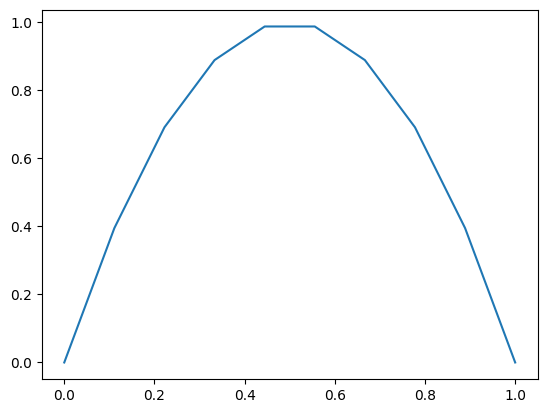

In [6]:
x=np.linspace(0,1,10)
plt.plot(x,f(x))

Escribimos la matriz A de forma manual

In [ ]:
A = sp.Matrix([[4,-1, 0, 0, 0, 0, 0, 0, 0],
              [-1, 4,-1, 0, 0, 0, 0, 0, 0],
              [0, -1, 4,-1, 0, 0, 0, 0, 0],
              [0, 0, -1, 4,-1, 0, 0, 0, 0],
              [0, 0, 0, -1, 4,-1, 0, 0, 0],
              [0, 0, 0, 0, -1, 4,-1, 0, 0],
              [0, 0, 0, 0, 0, -1, 4,-1, 0],
              [0, 0, 0, 0, 0, 0, -1, 4,-1],
              [0, 0, 0, 0, 0, 0, 0, -1, 4,]])

**Ejercicio 1**: Codificando la matriz A de manera más simple.

In [7]:
def tridiagonal(n, a, b):
    return sp.Matrix([
        [a if i == j else b if abs(i - j) == 1 else 0 for j in range(n)]
        for i in range(n)
    ])

In [8]:
r=1

In [11]:
A=tridiagonal(9, 2 + 2*r, -r)
A    #Corrresponde a la matriz de lado izquierdo de la igualdad

Matrix([
[ 4, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  4, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  4, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  4, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  4, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  4, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  4, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  4, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  4]])

In [12]:
B = tridiagonal(9, 2 - 2*r, r)
B    #Corrresponde a la matriz de lado derecho de la igualdad

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

Defino el vector b, el cual cumple con la condicion inicial en el eje x

In [13]:
b = sp.Matrix([f(0.1*(i+1)) for i in range(9)])
b

Matrix([
[0.36],
[0.64],
[0.84],
[0.96],
[ 1.0],
[0.96],
[0.84],
[0.64],
[0.36]])

Defino el método de Crank Nicolson

In [14]:
def crank_nicolson(A, B, b, j) :
  b_1 = B*b
  S = []
  for i in range(j) :
    sol = A.LUsolve(b_1)
    S.append(sol.T)
    b_1 = B*sol

  return sp.Matrix(S)  # matriz resultado

In [15]:
j=50

In [16]:
U = crank_nicolson(A, B, b, j)

### **Ejercicio 1.**
Implemente el método de Crank–Nicolson en un Jupyter Notebook (Google Colab), utilizando la librería **sympy** para construir las matrices del método.  
Genere una tabla similar a la **Tabla 2.6** del material proporcionado y utilícela para verificar que el código funciona correctamente. Emplee la librería `tabulate`.


In [24]:

data = [list(U.row(i)) for i in range(10)]

print (tabulate(data, tablefmt="grid"))


+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.301436 | 0.565746 | 0.761547 | 0.880442 | 0.920221 | 0.880442 | 0.761547 | 0.565746 | 0.301436 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.26763  | 0.504776 | 0.688489 | 0.802994 | 0.841718 | 0.802994 | 0.688489 | 0.504776 | 0.26763  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.23989  | 0.454784 | 0.623126 | 0.729952 | 0.766473 | 0.729952 | 0.623126 | 0.454784 | 0.23989  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.21645  | 0.411015 | 0.564592 | 0.662619 | 0.696285 | 0.662619 | 0.564592 | 0.411015 | 0.21645  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.195788 | 0.372138 | 0.511722 | 0.601117 | 0.631868 | 0.601117 | 0.511722 | 0.372138 | 0

In [19]:
U_np = np.array(U.tolist(), dtype = float)

In [21]:
x = np.linspace(0, 1, 9)
y = np.linspace(0, 0.5, j)
X, Y = np.meshgrid(x, y)


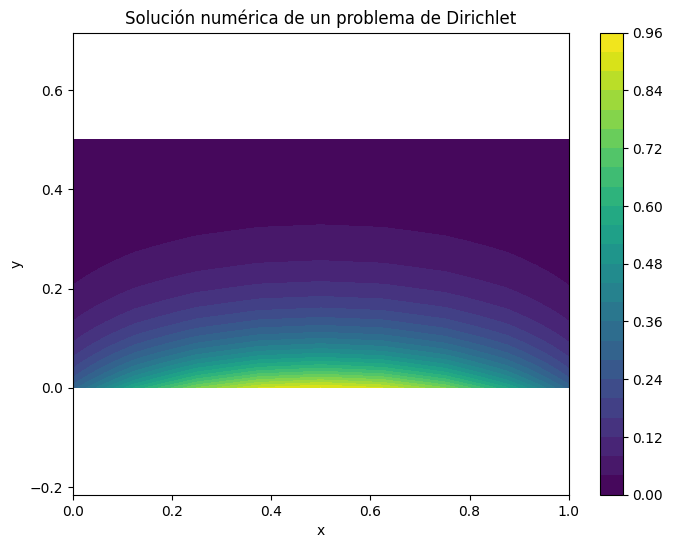

In [22]:

# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()


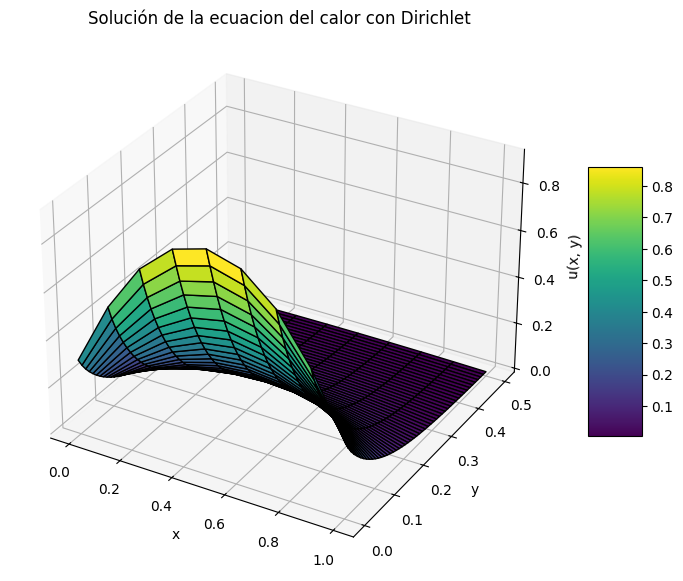

In [23]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuacion del calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### **Ejercicio 2.**
Compare la solución numérica obtenida con los valores exactos presentados en la **Tabla 2.7**.  
Grafique, en un mismo panel, la solución numérica y la solución exacta.  
Finalmente, calcule el **error absoluto** entre ambas soluciones.
